# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans

In [9]:
df['wants_in_flight_meals'].value_counts()

wants_in_flight_meals
0    28643
1    21357
Name: count, dtype: int64

In [22]:
df['trip_type'].value_counts()

trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: count, dtype: int64

In [14]:
sales_channel_counts= df['sales_channel'].value_counts()
print(sales_channel_counts)

sales_channel
Internet    44382
Mobile       5618
Name: count, dtype: int64


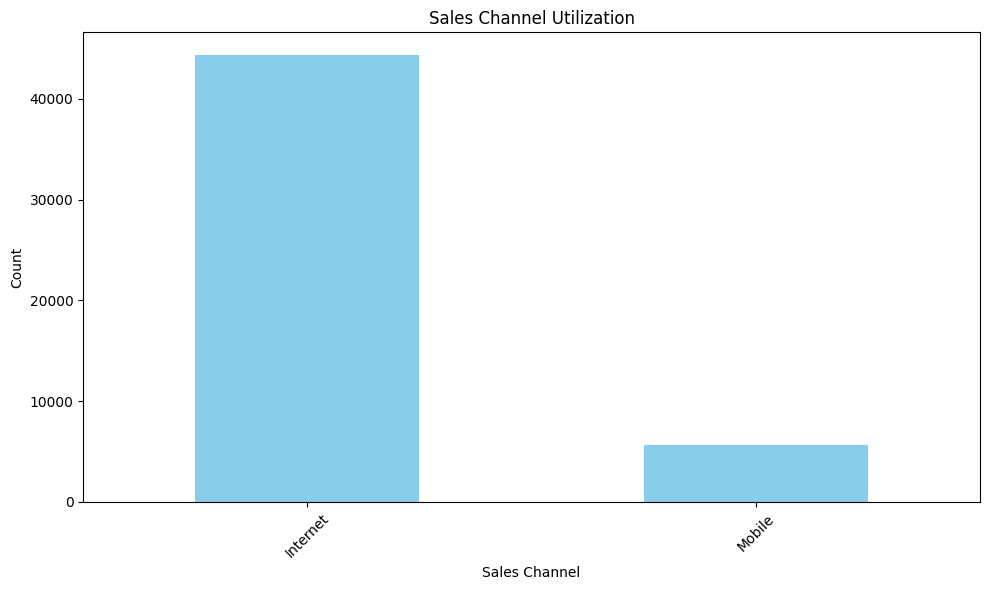

In [17]:
# Plot the distribution of sales channels
plt.figure(figsize=(10, 6))
sales_channel_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Sales Channel')
plt.ylabel('Count')
plt.title('Sales Channel Utilization')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
df['route'].value_counts()

route
AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: count, Length: 799, dtype: int64

In [13]:
df['booking_origin'].value_counts().head(10)

booking_origin
Australia      17872
Malaysia        7174
South Korea     4559
Japan           3885
China           3387
Indonesia       2369
Taiwan          2077
Thailand        2030
India           1270
New Zealand     1074
Name: count, dtype: int64

## Customer Segmentation and Targeted Marketing:
we utilize customer segmentation based on features like num_passengers, trip_type, length_of_stay, and booking_origin. Tailor marketing campaigns to each segment, offering personalized promotions and travel suggestions.

In [54]:
selected_features = ['num_passengers', 'trip_type', 'length_of_stay', 'booking_origin']
data = df[selected_features]

In [55]:
data.isna().sum()

num_passengers    0
trip_type         0
length_of_stay    0
booking_origin    0
dtype: int64

In [56]:
# Create a mapping of country names to unique IDs
country_id_mapping = {booking_origin: idx for idx, booking_origin in enumerate(data['booking_origin'].unique())}
# Replace country names with IDs
data['country_id'] = data['booking_origin'].map(country_id_mapping)

C:\Users\1998a\AppData\Local\Temp\ipykernel_21516\3712551083.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['country_id'] = data['booking_origin'].map(country_id_mapping)


In [57]:
trip = {
    "CircleTrip": 0,
    "OneWay": 1,
    "RoundTrip": 2,
    
}

data["trip_type"] = data["trip_type"].map(trip)


C:\Users\1998a\AppData\Local\Temp\ipykernel_21516\4009244363.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["trip_type"] = data["trip_type"].map(trip)


In [58]:
data.isna().sum()

num_passengers    0
trip_type         0
length_of_stay    0
booking_origin    0
country_id        0
dtype: int64

In [61]:
del data["booking_origin"]

In [63]:
# Preprocess and standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [64]:
data.isna().sum()

num_passengers    0
trip_type         0
length_of_stay    0
country_id        0
dtype: int64

In [65]:
# Determine the optimal number of clusters (K) using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

d:\BritishAirway-Data-Analysis\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


d:\BritishAirway-Data-Analysis\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\BritishAirway-Data-Analysis\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\BritishAirway-Data-Analysis\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\BritishAirway-Data-Analysis\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will chang

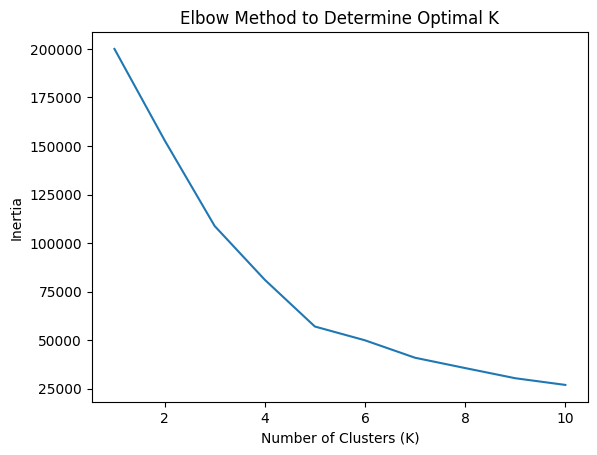

In [66]:
# Plot the Elbow Method
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal K')
plt.show()

We can see that the optimal number of clusters could be 5

In [67]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_data)

d:\BritishAirway-Data-Analysis\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=42)

In [68]:
# Assign each customer to a cluster
data['cluster'] = kmeans.predict(scaled_data)

C:\Users\1998a\AppData\Local\Temp\ipykernel_21516\580618371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = kmeans.predict(scaled_data)


In [71]:
# Analyze segments
segment_analysis = data.groupby('cluster').mean()
segment_analysis

,num_passengers,trip_type,length_of_stay,country_id
cluster,,,,
0,1.344853,2.000000,13.742046,5.764582
1,1.320710,2.000000,21.169431,37.786986
2,1.566600,0.769384,19.693837,21.966203
3,1.229793,2.000000,122.177355,20.259185
4,4.031965,2.000000,11.798928,11.352650


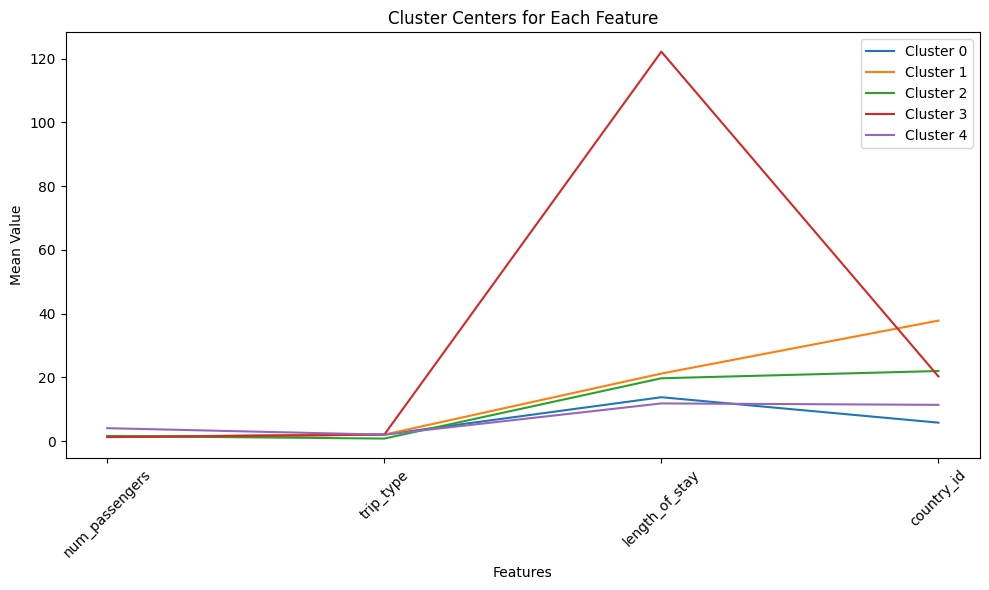

In [79]:
plt.figure(figsize=(10, 6))
for i in range(len(segment_analysis)):
    plt.plot(segment_analysis.columns, segment_analysis.iloc[i], label=f'Cluster {i}')
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.title('Cluster Centers for Each Feature')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We can see difference in cluster centers in length of stay and country of origin and marketing strategies could be applied using these features for different clustters.

## Customer Acquisition using Machine Learning Model

In [84]:
# Select relevant features
selected_features = ['num_passengers', 'trip_type', 'length_of_stay', 'flight_duration',
                     'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
                     'booking_complete']

# Use a subset of features
data_subset = df[selected_features]


In [86]:
# Encode categorical features
label_encoder = LabelEncoder()
data_subset['trip_type'] = label_encoder.fit_transform(data_subset['trip_type'])

C:\Users\1998a\AppData\Local\Temp\ipykernel_21516\1143587665.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['trip_type'] = label_encoder.fit_transform(data_subset['trip_type'])


In [92]:
# Split the data into features and target
X = data_subset.drop('booking_complete', axis=1)
y = data_subset['booking_complete']

In [93]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
# Initialize and train a RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [95]:
from sklearn.metrics import accuracy_score, classification_report

# Predictions
y_pred = clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.8347
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      8520
           1       0.28      0.08      0.12      1480

    accuracy                           0.83     10000
   macro avg       0.57      0.52      0.51     10000
weighted avg       0.77      0.83      0.79     10000



In [96]:
# Initialize and train a DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=52)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=52)

In [97]:
# Predictions
y_pred = tree.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.8331
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      8520
           1       0.28      0.08      0.13      1480

    accuracy                           0.83     10000
   macro avg       0.57      0.52      0.52     10000
weighted avg       0.77      0.83      0.79     10000



In [101]:
# Initialize the models
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)



In [125]:
# Define evaluation metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']

In [120]:
# Perform cross-validation and evaluate models
dt_cv_results = {metric: np.round(cross_val_score(decision_tree, X, y, cv=5, scoring=metric), 2) for metric in scoring}
rf_cv_results = {metric: np.round(cross_val_score(random_forest, X, y, cv=5, scoring=metric), 2) for metric in scoring}

# Print evaluation metrics
print("Decision Tree Cross-validation Results:")
for metric in scoring:
    print(f"{metric.capitalize()}: {np.mean(dt_cv_results[metric]):.2f}")

print("\nRandom Forest Cross-validation Results:")
for metric in scoring:
    print(f"{metric.capitalize()}: {np.mean(rf_cv_results[metric]):.2f}")

Decision Tree Cross-validation Results:
Accuracy: 0.59
Precision: 0.13
Recall: 0.27
F1: 0.13

Random Forest Cross-validation Results:
Accuracy: 0.61
Precision: 0.12
Recall: 0.24
F1: 0.12


In [121]:
# Train the Random Forest model for feature importance visualization
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [123]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

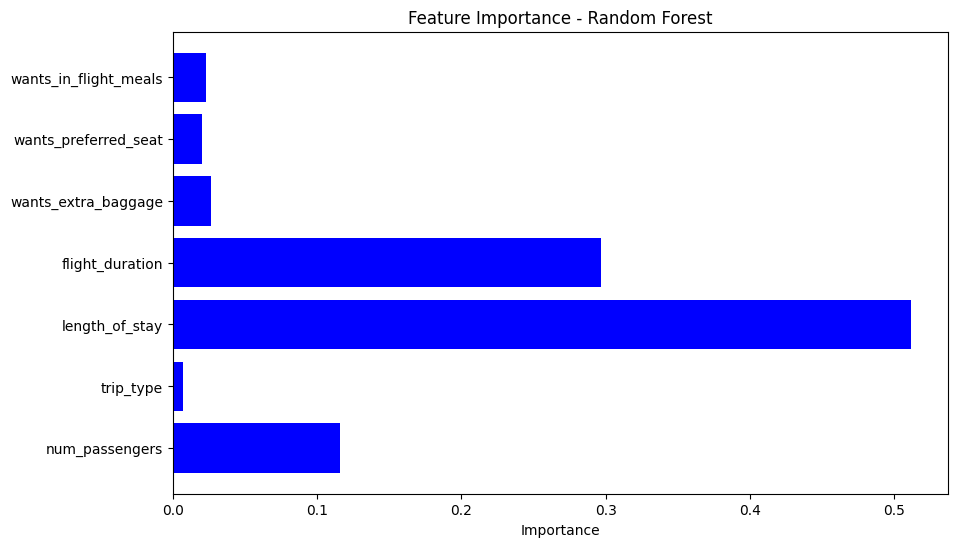

In [122]:
# Feature importance visualization
feature_importances = random_forest.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='blue')
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.show()

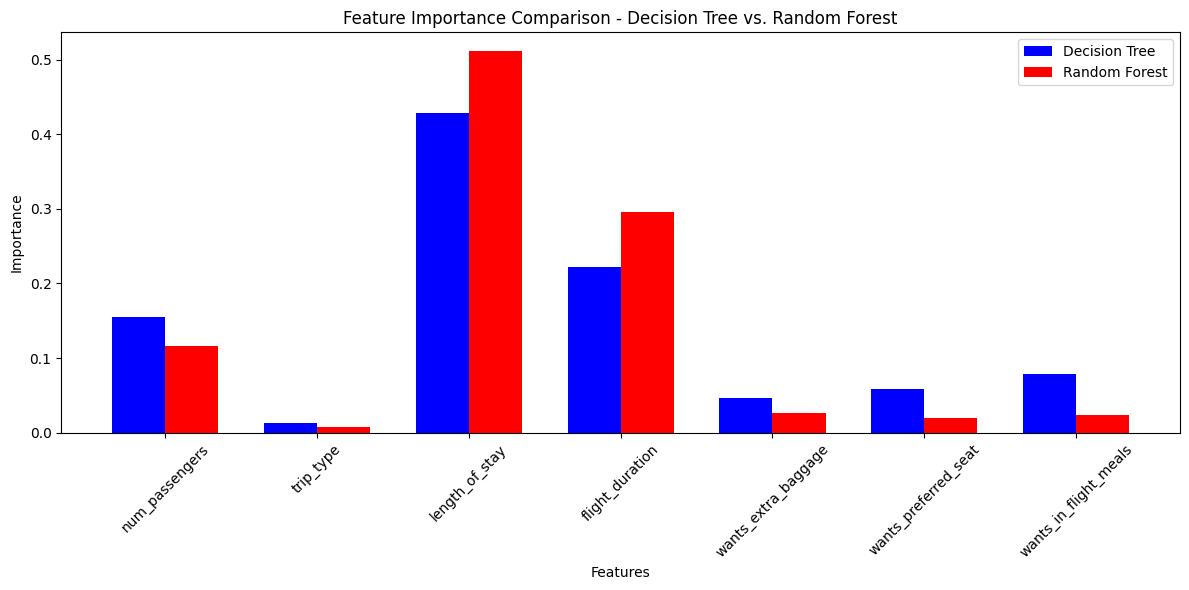

In [124]:
# Feature importance for Decision Tree
dt_feature_importances = decision_tree.feature_importances_

# Feature importance for Random Forest
rf_feature_importances = random_forest.feature_importances_

# Features
features = X.columns

# Set the positions and width for the bars
position = np.arange(len(features))
width = 0.35  # Width of the bars

# Create the grouped bar chart
plt.figure(figsize=(12, 6))
plt.bar(position - width/2, dt_feature_importances, width, label='Decision Tree', color='blue')
plt.bar(position + width/2, rf_feature_importances, width, label='Random Forest', color='red')

# Customize the plot
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Comparison - Decision Tree vs. Random Forest')
plt.xticks(position, features, rotation=45)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()



In [127]:
# Predict probabilities for the test set
rf_y_prob = random_forest.predict_proba(X_test)[:, 1]

# Calculate the AUC score for Random Forest
rf_auc = roc_auc_score(y_test, rf_y_prob)

print("Random Forest AUC Score:", rf_auc)

Random Forest AUC Score: 0.6316000904073087


In [128]:
# Predict probabilities for the test set
dt_y_prob = decision_tree.predict_proba(X_test)[:, 1]

# Calculate the AUC score for Random Forest
dt_auc = roc_auc_score(y_test, dt_y_prob)

print("Decision Tree AUC Score:", dt_auc)

Decision Tree AUC Score: 0.6173206128663875
